<a href="https://colab.research.google.com/github/milenar18/Topicos_Aplicada_II-Tutorial_3/blob/main/Exercise_45.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Processando cloud1.txt


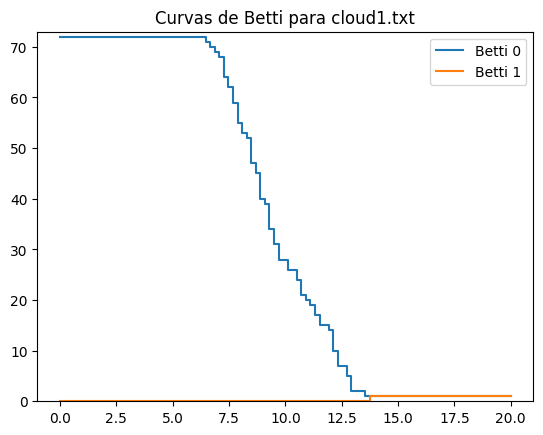

----------------------------------------
Processando cloud2.txt


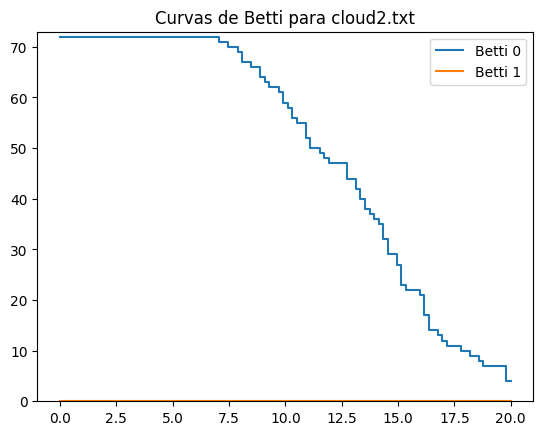

----------------------------------------
Processando cloud3.txt


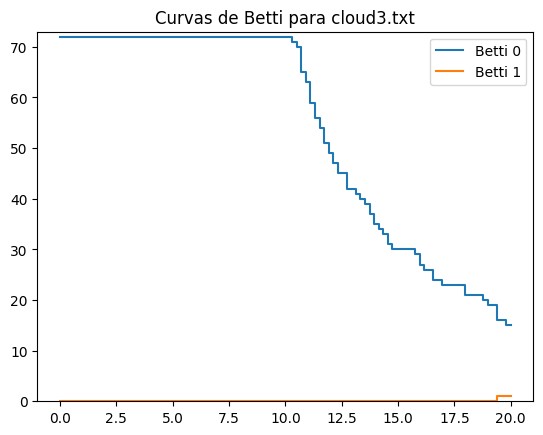

----------------------------------------
Processando cloud4.txt


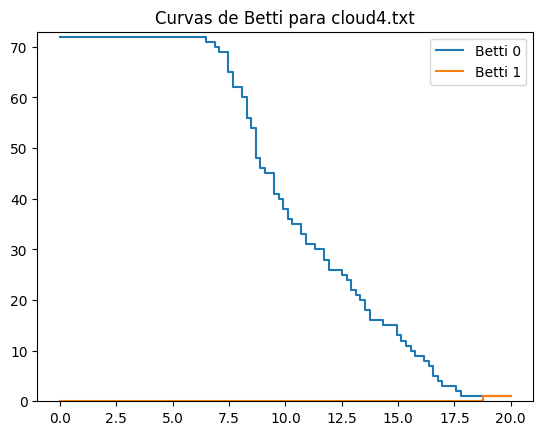

----------------------------------------
Processando cloud5.txt


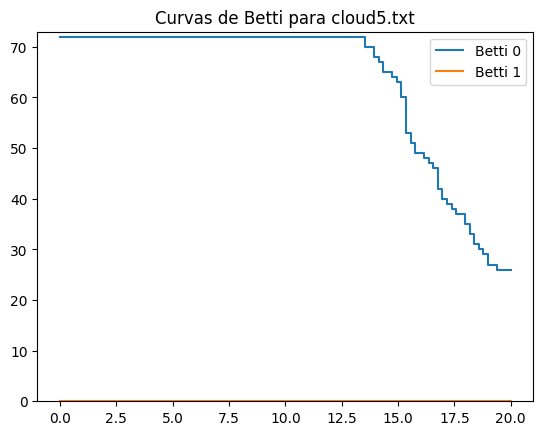

----------------------------------------
Processando cloud6.txt


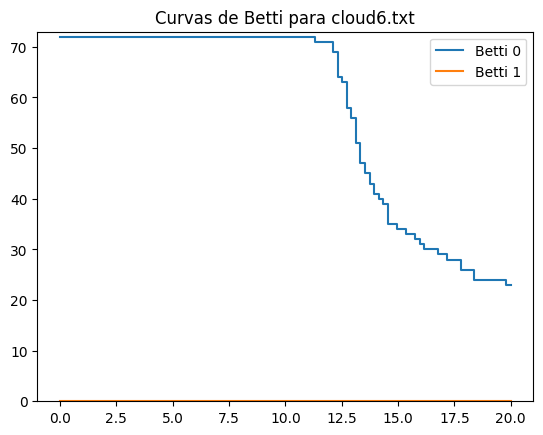

----------------------------------------
Processando cloud7.txt


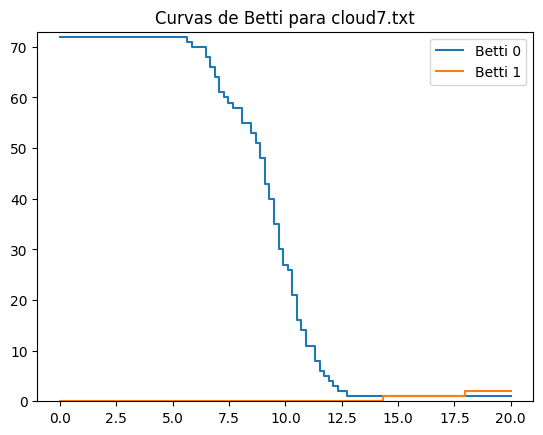

----------------------------------------
Processando cloud8.txt


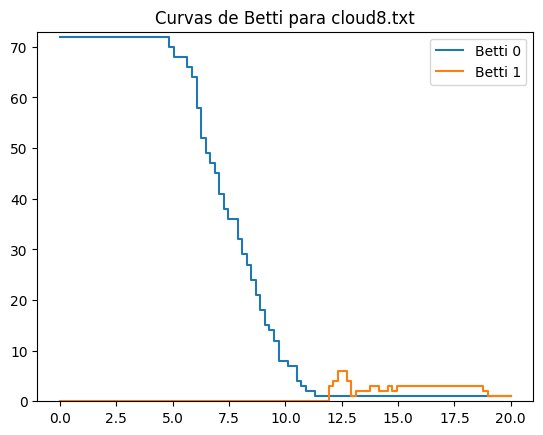

----------------------------------------
Processando cloud9.txt


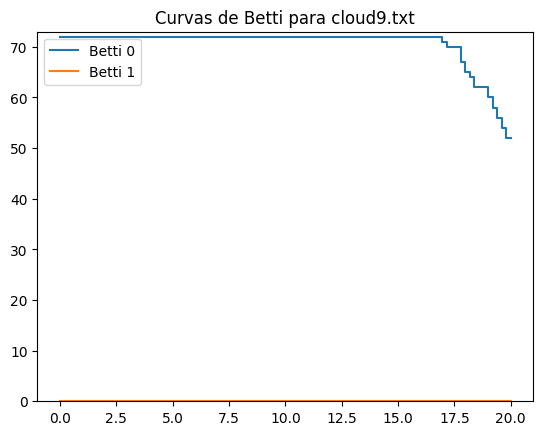

----------------------------------------
Processando cloud10.txt


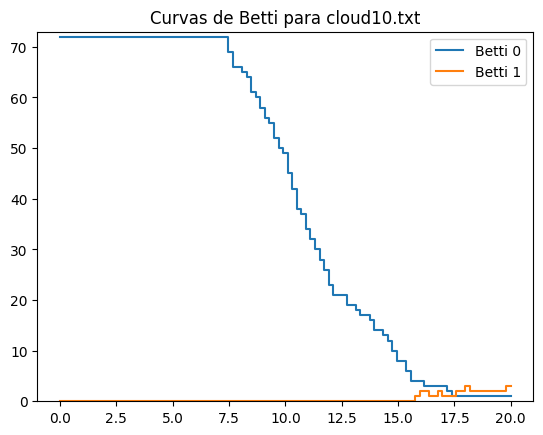

----------------------------------------
Processando cloud11.txt


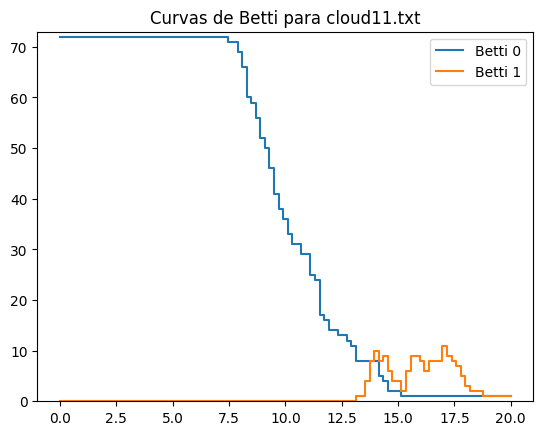

----------------------------------------
Processando cloud12.txt


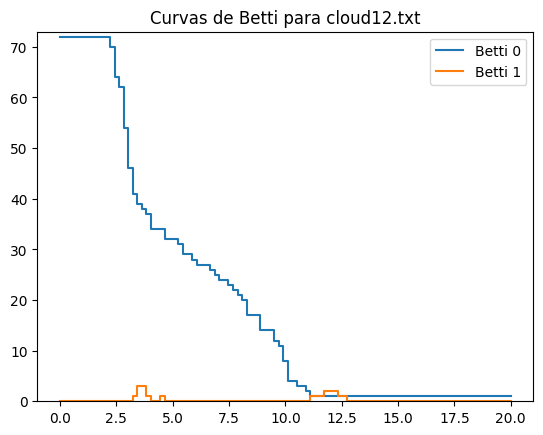

----------------------------------------
Processando cloud13.txt


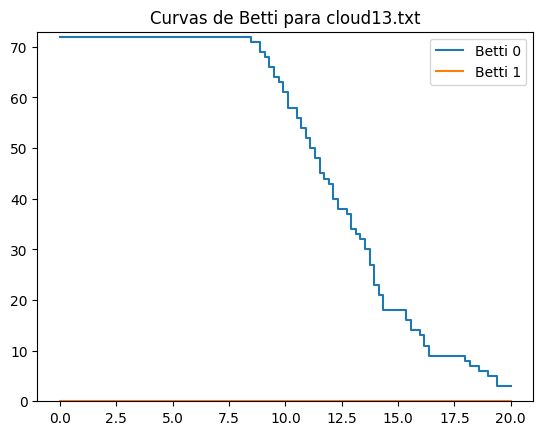

----------------------------------------
Processando cloud14.txt


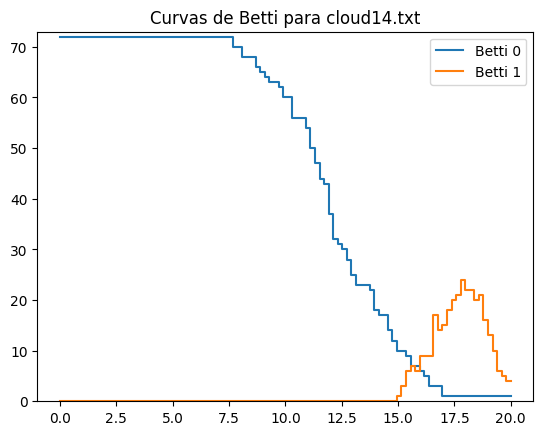

----------------------------------------
Processando cloud15.txt


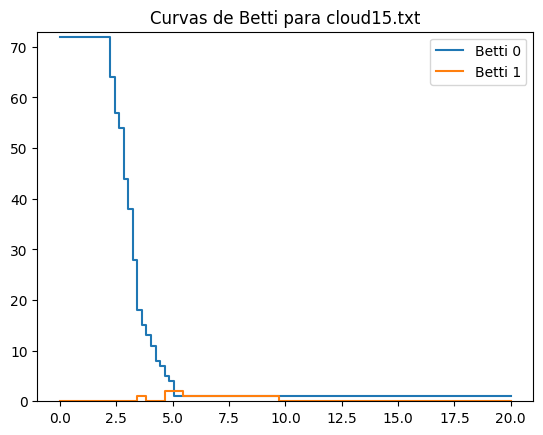

----------------------------------------
Processando cloud16.txt


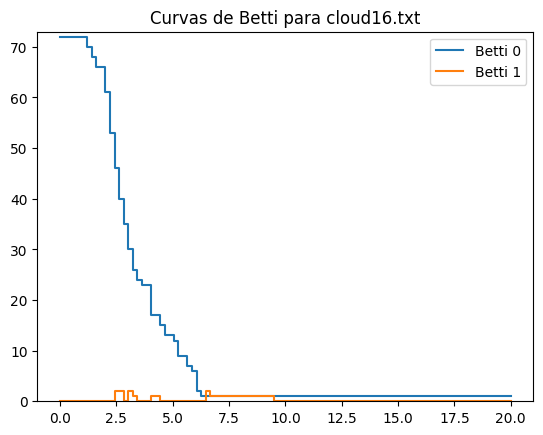

----------------------------------------
Processando cloud17.txt


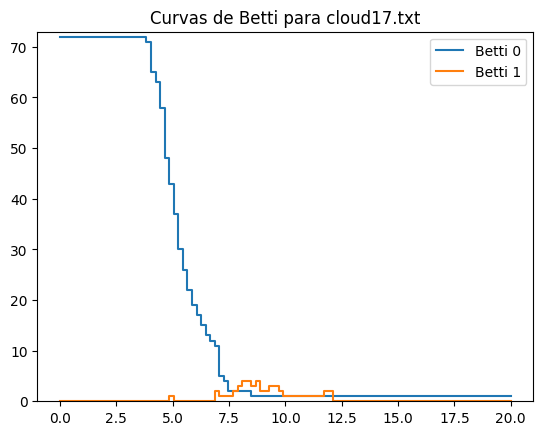

----------------------------------------
Processando cloud18.txt


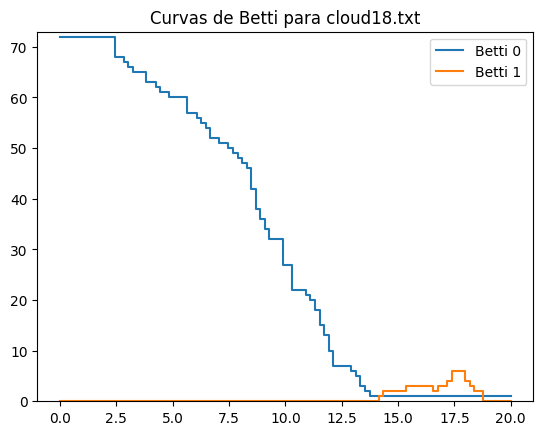

----------------------------------------
Processando cloud19.txt


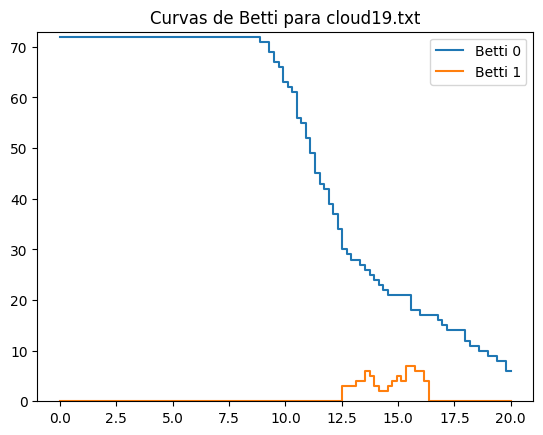

----------------------------------------
Processando cloud20.txt


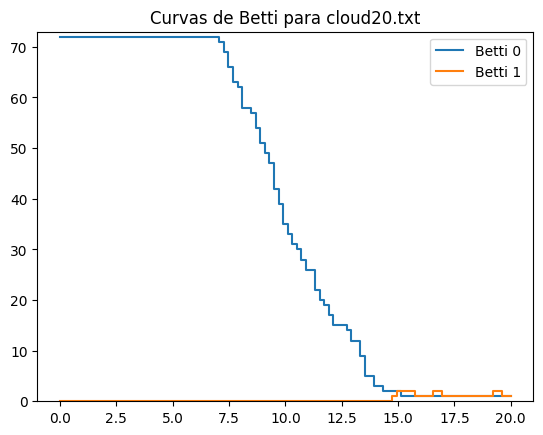

----------------------------------------


In [7]:
!pip install gudhi networkx matplotlib
import gudhi
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# ... (Suas outras funções como EulerCharacteristic, DrawSimplicialComplex, etc. aqui) ...

def OpenDatasetEx45(i):
    file_path = f'cloud{i}.txt'
    try:
        with open(file_path, 'r') as f:
            matrix_data = f.read()
    except FileNotFoundError:
        print(f"Erro: Arquivo não encontrado no caminho: {file_path}")
        return None

    matrix = np.asarray([[float(a) for a in item.split()] for item in matrix_data.split('\n')[:-1]])
    return matrix

def GetBettiCurvesFromPointCloud(point_cloud, filtration_values, dim=2):
    # Cria o complexo de Rips
    rips_complex = gudhi.RipsComplex(points=point_cloud, max_edge_length=filtration_values[-1])

    # Cria a árvore de simplexos
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=dim)

    # Calcula a persistência
    simplex_tree.compute_persistence()

    # Inicializa as curvas de Betti para cada dimensão
    betti_curves = {d: [] for d in range(dim + 1)}

    # Calcula as curvas de Betti para cada valor de filtração
    for filtration_value in filtration_values:
        for d in range(dim + 1):
            # Soma 1 para cada intervalo de persistência que inclui o valor de filtração atual
            betti = sum(1 for birth, death in simplex_tree.persistence_intervals_in_dimension(d)
                        if birth <= filtration_value < death)
            betti_curves[d].append(betti)

    return betti_curves

# Processa cloud1.txt até cloud20.txt
for i in range(1, 21):
    print(f"Processando cloud{i}.txt")
    X = OpenDatasetEx45(i)

    if X is not None:
        I = np.linspace(0, 20, 100)
        Betti_curves = GetBettiCurvesFromPointCloud(X, I, dim=2)

        # Plota as curvas de Betti (opcional)
        plt.figure()
        plt.step(I, Betti_curves[0], label="Betti 0")
        plt.step(I, Betti_curves[1], label="Betti 1")
        plt.ylim(0, max(max(Betti_curves[0]), max(Betti_curves[1])) + 1) # Ajusta o limite y
        plt.title(f'Curvas de Betti para cloud{i}.txt')
        plt.legend()
        plt.show()

    print("-" * 40)  # Separador entre arquivos